# Bank Churn Data Modeling Project

## Setup

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [58]:
file_path='../Data/prepped_bank_churn.csv'
data=pd.read_csv(file_path)

In [ ]:
#Check that I did it correctly
data.info()

<Axes: >

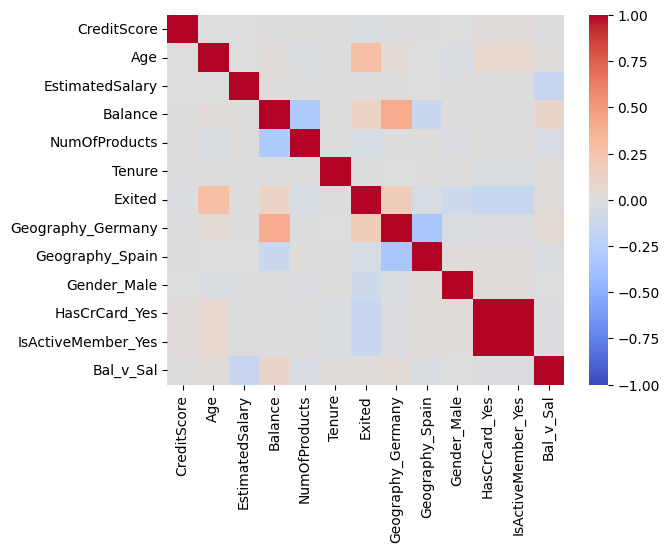

In [4]:
#Went back through the lesson and saw this pro tip
sns.heatmap(data.corr(numeric_only=True),vmin=-1,vmax=1,cmap="coolwarm")

So Age, Balance and being German are the most positively correlated to churn and having a credit card and being an active member have a negative correlation to churn. I will make note of this in the model fitting and tuning portion of the project.

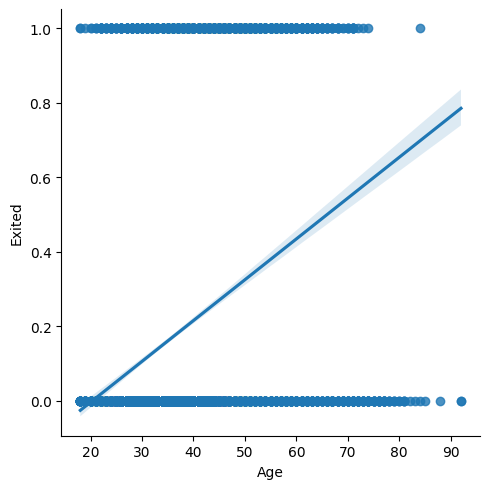

In [22]:
sns.lmplot(data,x="Age", y="Exited")

## More Feature Engineering

In [59]:
#Instructions for this project started from the beginning, but I am not getting lost in EDA. They add a new feature: income v products.
#I will also be renaming the Bal_v_Sal column to 'Bal_to_Sal' based on this project's instructions
data=data.rename(columns={'Bal_v_Sal':'Bal_to_Sal'})
data['Sal_v_Prods']=round(data.EstimatedSalary/data.NumOfProducts,2)
data.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Bal_to_Sal,Sal_v_Prods
0,619,42,101348.88,0.00,1,2,1,False,False,False,True,True,0.00,101348.88
1,608,41,112542.58,83807.86,1,1,0,False,True,False,True,True,0.74,112542.58
2,502,42,113931.57,159660.80,3,8,1,False,False,False,False,False,1.40,37977.19
3,699,39,93826.63,0.00,2,1,0,False,False,False,False,False,0.00,46913.32
4,850,43,79084.10,125510.82,1,2,0,False,True,False,True,True,1.59,79084.10


In [61]:
#le sigh - I was so excited to start modeling that I ignored my gut and didn't flip the Boolean columns to ints AAAAAAnd it came back to bite me in the statsmodels
bools = ['Geography_Germany', 'Geography_Spain','Gender_Male','HasCrCard_Yes','IsActiveMember_Yes'] 

for col in bools:
    data[col]=data[col].astype(int)
    

#Also, we are going to trim down our dummy column names
data=data.rename(columns={'Geography_Germany':'Germany', 'Geography_Spain':'Spain','Gender_Male':'Male','HasCrCard_Yes':'CrCard','IsActiveMember_Yes':'Active'})

In [62]:
data.head()

,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure,Exited,Germany,Spain,Male,CrCard,Active,Bal_to_Sal,Sal_v_Prods
0,619,42,101348.88,0.00,1,2,1,0,0,0,1,1,0.00,101348.88
1,608,41,112542.58,83807.86,1,1,0,0,1,0,1,1,0.74,112542.58
2,502,42,113931.57,159660.80,3,8,1,0,0,0,0,0,1.40,37977.19
3,699,39,93826.63,0.00,2,1,0,0,0,0,0,0,0.00,46913.32
4,850,43,79084.10,125510.82,1,2,0,0,1,0,1,1,1.59,79084.10


## Split the Data

In [73]:
#Define the features
X=data[['Age','Balance','EstimatedSalary','Germany','Spain','Male','Bal_to_Sal','Sal_v_Prods']]

#Define the target
y=data['Exited']

#Split the training and test data sets
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=12345, 
                                   test_size=0.2, 
                                   shuffle=True)

In [72]:
#Check out the data
#X_train.head()
y_train.head()


9919    0
7994    1
3564    1
6734    1
1588    0
Name: Exited, dtype: int64

## Linear Regression Model

### Inference using Statsmodels

In [68]:
#import statsmodel
import statsmodels.api as sm

#set the variables
x=sm.add_constant(data['Age'])
X=sm.add_constant(data[["Age","Balance","EstimatedSalary","Germany"]])
y=data["Exited"]

model=sm.OLS(y,x).fit()
multi_model = sm.OLS(y,X).fit()

OLS_model_sum=pd.DataFrame(model.summary().tables[0].data[1:], columns=model.summary().tables[0].data[0])
OLS_var_sum=pd.DataFrame(model.summary().tables[1].data[1:], columns=model.summary().tables[1].data[0])
OLS_resid_stats=pd.DataFrame(model.summary().tables[2].data[1:], columns=model.summary().tables[2].data[0])
#OLS_model_sum
#OLS_var_sum
#OLS_resid_stats
mmOLS_model_sum=pd.DataFrame(multi_model.summary().tables[0].data[1:], columns=model.summary().tables[0].data[0])
mmOLS_var_sum=pd.DataFrame(multi_model.summary().tables[1].data[1:], columns=model.summary().tables[1].data[0])
mmOLS_resid_stats=pd.DataFrame(multi_model.summary().tables[2].data[1:], columns=model.summary().tables[2].data[0])
#mmOLS_model_sum
#mmOLS_var_sum
#mmOLS_resid_stats

print(OLS_model_sum,mmOLS_model_sum)


      Dep. Variable:            Exited    R-squared:               0.081
0             Model:               OLS    Adj. R-squared:          0.081
1            Method:     Least Squares    F-statistic:             886.2
2              Date:  Sun, 10 Aug 2025    Prob (F-statistic):  1.16e-186
3              Time:          21:05:48    Log-Likelihood:        -4670.3
4  No. Observations:             10000    AIC:                     9345.
5      Df Residuals:              9998    BIC:                     9359.
6          Df Model:                 1                                  
7   Covariance Type:         nonrobust                                         Dep. Variable:            Exited    R-squared:               0.081
0             Model:               OLS    Adj. R-squared:          0.109
1            Method:     Least Squares    F-statistic:             308.3
2              Date:  Sun, 10 Aug 2025    Prob (F-statistic):  1.70e-250
3              Time:          21:05:48    Log-Likel

The features are statistically significant but not necessarily indicative of churn using this model.
Since the target is binary and not continuous, it throws interpreting the usual statistics for a loop.
* R-squared is 0.081 for both models, Adj. R-squared increases to 0.093 after adding Balance as an additional feature.

In [69]:
#test out predictions using the OLS model
model.predict([1,35])
multi_model.predict([1,35,50000])

ValueError: shapes (1,3) and (5,) not aligned: 3 (dim 1) != 5 (dim 0)

Inference-wise, age has a significant correlation to customers leaving . The older the customer, the more likely to leave.

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse

print(f"MAE: {mae(y,model.predict())}, multi MAE: {mae(y,multi_model.predict())}")
print(f"RMSE: {rmse(y,model.predict())}, multi RMSE: {rmse(y,multi_model.predict())}")

MAE: 0.2982044653760302, multi MAE: 0.2901714522231217
RMSE: 0.14899923690968994, multi RMSE: 0.14439121027088522


**Assumptions**
1. Linearity - POSSIBLE VIOLATION (Target isn't continuous)
2. Independence of Errors
3. Normality of Errors
4. No Perfect Collinearity - POSSIBLE VIOLATION (Balance and Salary, Age and Salary, Balance and Tenure, ...)
5. Equal Variance of Errors

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y,X).exog

pd.Series([vif(variables,i) for i in range(variables.shape[1])],index=X.columns)

const              19.108779
Age                 1.002359
Balance             1.191972
EstimatedSalary     1.000261
Germany             1.193576
dtype: float64

## Logistic Regression Model

I think that I should scale my numeric columns for this...but I'll wait until later to see the difference it makes to the model.

In [78]:
# Create validation data set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=12345)

#print the split sizes
print(f"Training Set Rows: {X_train.shape[0]}", f"Validation Set Rows: {X_valid.shape[0]}", f"Test Set Rows: {X_test.shape[0]}")

Training Set Rows: 8000 Validation Set Rows: 2000 Test Set Rows: 2000


In [80]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression().fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Scoring

In [81]:
from sklearn.metrics import r2_score as r2

print(f"Training R2: {r2(y_train,log_model.predict(X_train))}")
print(f"Validation R2: {r2(y_valid,log_model.predict(X_valid))}")


Training R2: -0.1843038909787229
Validation R2: -0.24167933407873776


**Eight Features-Not Standardized**
- Training R2: -0.1843038909787229
- Validation R2: -0.24167933407873776

### Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(X_train)

print(confusion_matrix(y_train,y_pred))

[[6313   77]
 [1446  164]]


[Text(0.5, 23.52222222222222, 'Actual'),
 Text(77.92222222222227, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')]

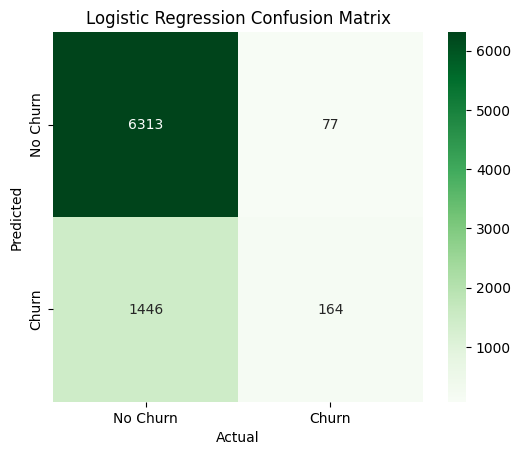

In [86]:
conmat=confusion_matrix(y_train,y_pred)
sns.heatmap(conmat,cmap="Greens",annot=True,fmt="g",square=True,xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn']).set(xlabel='Actual',ylabel='Predicted',title='Logistic Regression Confusion Matrix')

In [110]:
print(f"Accuracy = {round((conmat[0,0]+conmat[1,1])/conmat.sum(),2)*100}%")
print(f"Precision = {round(conmat[0,0]/(conmat[0,0]+conmat[1,0]),2)*100}%")
print(f"Recall = {round(conmat[0,0]/(conmat[0,0]+conmat[1,1]),2)*100}%")


Accuracy = 81.0%
Precision = 81.0%
Recall = 97.0%


In [111]:
print(y.value_counts(normalize=True))

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


Yeah, we got us some imbalance here...